In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales = pd.read_csv("sales.csv")
creators = pd.read_csv("creators.csv")


In [2]:
total_revenue = sales['revenue'].sum()
total_creators = creators['creator_id'].nunique()

rpc_all = total_revenue / total_creators

print("Total Revenue:", total_revenue)
print("Total Creators:", total_creators)
print("RPC (All Creators):", round(rpc_all,2))


Total Revenue: 311839.7
Total Creators: 500
RPC (All Creators): 623.68


In [3]:
monetized_creators = sales['creator_id'].nunique()

rpc_monetized = total_revenue / monetized_creators

print("Monetized Creators:", monetized_creators)
print("RPC (Monetized Only):", round(rpc_monetized,2))


Monetized Creators: 500
RPC (Monetized Only): 623.68


In [4]:
creator_rev = (
    sales
    .groupby('creator_id')['revenue']
    .sum()
    .reset_index()
    .sort_values('revenue', ascending=False)
)

creator_rev.head()


,creator_id,revenue
205,206,1536.36
116,117,1533.34
156,157,1507.32
168,169,1463.12
208,209,1459.13


In [5]:
top10 = int(0.1 * len(creator_rev))

top10_rev = creator_rev.head(top10)['revenue'].sum()

print("Top 10% Revenue Share:", round(top10_rev/total_revenue*100,2),"%")


Top 10% Revenue Share: 18.89 %


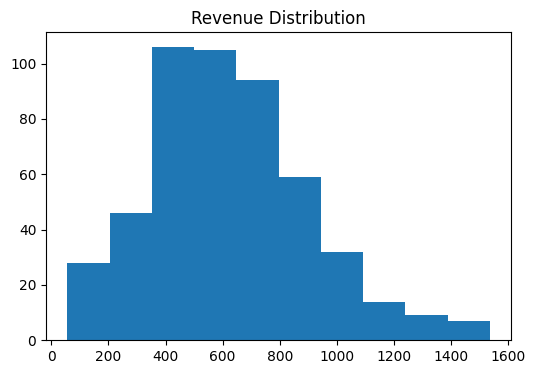

In [6]:
plt.figure(figsize=(6,4))
plt.hist(creator_rev['revenue'])
plt.title("Revenue Distribution")
plt.show()
